## Simple Linear Regression

In [1]:
# Import the functions
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv

In [2]:
# Check the dataset directory
%pwd

'C:\\Users\\SK\\Desktop\\Python\\Python\\Python Project\\3. Simple Linear Regression'

In [3]:
# Change the working directory
import os
os.chdir("/Users/SK/Desktop/SK/NUS EBA/Semester 2/Statistical BootCamp/WK3")

In [4]:
# Read the CSV file
df = pd.read_csv("Price_vs_Age.csv")

In [5]:
# Explore the data
df.shape

(10, 2)

In [6]:
df.head()

,Age,Price
0,6,125
1,6,115
2,6,130
3,4,160
4,2,219


In [7]:
df.dtypes

Age      int64
Price    int64
dtype: object

In [8]:
# Plot the scatter plot
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Price'])
plt.title("Age vs Price")
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
# Check the correlation between variable
np.corrcoef(df['Age'], df['Price'])

array([[ 1.        , -0.96787159],
       [-0.96787159,  1.        ]])

In [10]:
# Simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(df['Age']).reshape(-1,1)
y = np.array(df['Price'])
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Check the r-square
r_sq = model.score(x,y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9367754058211296


In [12]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 291.6019417475728
slope: [-27.90291262]


In [13]:
# Get the final report of regression model
import statsmodels.formula.api as smf
results = smf.ols('Price~ Age', data = df).fit()

In [14]:
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     118.5
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           4.48e-06
Time:                        20:17:11   Log-Likelihood:                -39.639
No. Observations:                  10   AIC:                             83.28
Df Residuals:                       8   BIC:                             83.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    291.6019     11.433     25.506      0.0

C:\Users\SK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


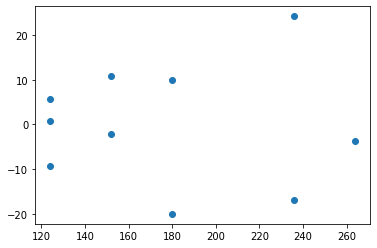

In [15]:
# Residuals Vs Fitted
pred_val = results.fittedvalues.copy()
true_val = df['Price'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots()
_ = ax.scatter(pred_val, residual)

0.9807456279764489

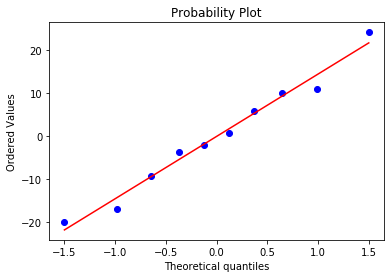

In [16]:
# Normality
import scipy as sp
fig, ax = plt.subplots()
_, (_, _, r) = sp.stats.probplot(residual, plot = ax, fit =True)
r**2

In [17]:
# Predict the data by using the model
import pandas as pd
data = {'Age': [4]}
newdata = pd.DataFrame(data, ['Age'])
print(newdata)

     Age
Age    4


In [18]:
y_pred = results.predict(newdata)
print('predicted response:', y_pred, sep = '\n')

predicted response:
Age    179.990291
dtype: float64
